In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
import json
from pprint import pprint

In [2]:
#import csv
oscars_data = "../the_oscar_award.csv"

In [3]:
#create dataframe
oscars_data_all_winners_df = pd.read_csv(oscars_data)
oscars_data_all_winners_df.head()

year_film  year_ceremony  ceremony                   category  \
0       1927           1928         1    ACTOR IN A LEADING ROLE   
1       1927           1928         1    ACTOR IN A LEADING ROLE   
2       1927           1928         1  ACTRESS IN A LEADING ROLE   
3       1927           1928         1  ACTRESS IN A LEADING ROLE   
4       1927           1928         1  ACTRESS IN A LEADING ROLE   

                  name              film  winner  
0  Richard Barthelmess         The Noose   False  
1        Emil Jannings  The Last Command    True  
2       Louise Dresser   A Ship Comes In   False  
3         Janet Gaynor        7th Heaven    True  
4       Gloria Swanson    Sadie Thompson   False

In [4]:
#find the winners
oscars_data_all_winners_df = oscars_data_all_winners_df[oscars_data_all_winners_df['winner'] == True] 
oscars_data_all_winners_df.head()

year_film  year_ceremony  ceremony                   category  \
1        1927           1928         1    ACTOR IN A LEADING ROLE   
3        1927           1928         1  ACTRESS IN A LEADING ROLE   
6        1927           1928         1              ART DIRECTION   
9        1927           1928         1             CINEMATOGRAPHY   
10       1927           1928         1             CINEMATOGRAPHY   

                       name              film  winner  
1             Emil Jannings  The Last Command    True  
3              Janet Gaynor        7th Heaven    True  
6   William Cameron Menzies         The Dove;    True  
9            Charles Rosher           Sunrise    True  
10              Karl Struss           Sunrise    True

In [5]:
#create dataframe of all winners except best picture
#select only main categories and remove best film

oscars_data_all_other_winners_df = oscars_data_all_winners_df[oscars_data_all_winners_df['category'] != 'BEST PICTURE']

oscars_data_all_other_winners_df.head()


year_film  year_ceremony  ceremony                   category  \
1        1927           1928         1    ACTOR IN A LEADING ROLE   
3        1927           1928         1  ACTRESS IN A LEADING ROLE   
6        1927           1928         1              ART DIRECTION   
9        1927           1928         1             CINEMATOGRAPHY   
10       1927           1928         1             CINEMATOGRAPHY   

                       name              film  winner  
1             Emil Jannings  The Last Command    True  
3              Janet Gaynor        7th Heaven    True  
6   William Cameron Menzies         The Dove;    True  
9            Charles Rosher           Sunrise    True  
10              Karl Struss           Sunrise    True

In [6]:
# create lists to hold reponse info     
film_list = [] 
year_release_list = []       
date_release_list = []     

movies = oscars_data_all_other_winners_df["film"]
years = oscars_data_all_other_winners_df["year_film"]

In [7]:
from config import OMDb_api_key

query_url = f"http://www.omdbapi.com/?apikey={OMDb_api_key}&t="
r = requests.get(query_url +"The Private Life of Helen of Troy").json()
#r

In [8]:
#import API data from OMDb 

from config import OMDb_api_key

query_url = f"http://www.omdbapi.com/?apikey={OMDb_api_key}&t="
response = requests.get(query_url +"Underworld").json()
#response


In [9]:
#create list of movies and release years for films with awards other than best motion picture


counter = 1
nb_tries = 10

for movie,year in zip(movies,years):
#for movie in movies:
    
    #print(movie,year)
    movie = str(movie)
    movie_url = query_url + movie.replace(' ','+')
    response = requests.get(movie_url)
    results = response
    response
    print(f'The Oscar Winners for {year} is {movie}')
    #oscars_best_picture_nominees_df.loc[index, "oscars_best_picture_nominees_df"] = results[0]['Date Released']
    
    try:
        response.raise_for_status()
        data = response.json()
        film_list.append(data['Title'])
        year_release_list.append(data['Year'])
        date_release_list.append(data['Released'])
        #oscars_best_picture_nominees_df.loc[date_release_list, "oscars_best_picture_nominees_df"] = data[0]['Date Released']
    except requests.exceptions.HTTPError as e:
        pass
    except KeyError as e:
        pass
   

The Oscar Winners for 1927 is The Last Command
The Oscar Winners for 1927 is 7th Heaven
The Oscar Winners for 1927 is The Dove;
The Oscar Winners for 1927 is Sunrise
The Oscar Winners for 1927 is Sunrise
The Oscar Winners for 1927 is Two Arabian Knights
The Oscar Winners for 1927 is 7th Heaven
The Oscar Winners for 1927 is Wings
The Oscar Winners for 1927 is Sunrise
The Oscar Winners for 1927 is 7th Heaven
The Oscar Winners for 1927 is Underworld
The Oscar Winners for 1927 is nan
The Oscar Winners for 1927 is nan
The Oscar Winners for 1927 is nan
The Oscar Winners for 1928 is In Old Arizona
The Oscar Winners for 1928 is Coquette
The Oscar Winners for 1928 is The Bridge of San Luis Rey
The Oscar Winners for 1928 is White Shadows in the South Seas
The Oscar Winners for 1928 is The Divine Lady
The Oscar Winners for 1928 is The Patriot
The Oscar Winners for 1929 is Disraeli
The Oscar Winners for 1929 is The Divorcee
The Oscar Winners for 1929 is King of Jazz
The Oscar Winners for 1929 is W

The Oscar Winners for 1939 is When Tomorrow Comes
The Oscar Winners for 1939 is The Rains Came
The Oscar Winners for 1939 is Mr. Smith Goes to Washington
The Oscar Winners for 1939 is Gone with the Wind
The Oscar Winners for 1939 is nan
The Oscar Winners for 1939 is nan
The Oscar Winners for 1939 is nan
The Oscar Winners for 1939 is nan
The Oscar Winners for 1939 is nan
The Oscar Winners for 1939 is nan
The Oscar Winners for 1940 is The Philadelphia Story
The Oscar Winners for 1940 is The Westerner
The Oscar Winners for 1940 is Kitty Foyle
The Oscar Winners for 1940 is The Grapes of Wrath
The Oscar Winners for 1940 is Pride and Prejudice
The Oscar Winners for 1940 is The Thief of Bagdad
The Oscar Winners for 1940 is Rebecca
The Oscar Winners for 1940 is The Thief of Bagdad
The Oscar Winners for 1940 is The Grapes of Wrath
The Oscar Winners for 1940 is North West Mounted Police
The Oscar Winners for 1940 is Pinocchio
The Oscar Winners for 1940 is Tin Pan Alley
The Oscar Winners for 1940

The Oscar Winners for 1946 is The Cat Concerto
The Oscar Winners for 1946 is Facing Your Danger
The Oscar Winners for 1946 is A Boy and His Dog
The Oscar Winners for 1946 is The Jolson Story
The Oscar Winners for 1946 is Blithe Spirit
The Oscar Winners for 1946 is Vacation from Marriage
The Oscar Winners for 1946 is The Seventh Veil
The Oscar Winners for 1946 is The Best Years of Our Lives
The Oscar Winners for 1946 is nan
The Oscar Winners for 1946 is nan
The Oscar Winners for 1946 is nan
The Oscar Winners for 1946 is nan
The Oscar Winners for 1946 is nan
The Oscar Winners for 1947 is A Double Life
The Oscar Winners for 1947 is Miracle on 34th Street
The Oscar Winners for 1947 is The Farmer's Daughter
The Oscar Winners for 1947 is Gentleman's Agreement
The Oscar Winners for 1947 is Great Expectations
The Oscar Winners for 1947 is Black Narcissus
The Oscar Winners for 1947 is Great Expectations
The Oscar Winners for 1947 is Black Narcissus
The Oscar Winners for 1947 is Gentleman's Agre

The Oscar Winners for 1952 is Plymouth Adventure
The Oscar Winners for 1952 is The Greatest Show on Earth
The Oscar Winners for 1952 is The Bad and the Beautiful
The Oscar Winners for 1952 is The Lavender Hill Mob
The Oscar Winners for 1952 is nan
The Oscar Winners for 1952 is nan
The Oscar Winners for 1952 is nan
The Oscar Winners for 1952 is nan
The Oscar Winners for 1952 is nan
The Oscar Winners for 1952 is nan
The Oscar Winners for 1952 is nan
The Oscar Winners for 1953 is Stalag 17
The Oscar Winners for 1953 is From Here to Eternity
The Oscar Winners for 1953 is Roman Holiday
The Oscar Winners for 1953 is From Here to Eternity
The Oscar Winners for 1953 is Julius Caesar
The Oscar Winners for 1953 is The Robe
The Oscar Winners for 1953 is From Here to Eternity
The Oscar Winners for 1953 is Shane
The Oscar Winners for 1953 is Roman Holiday
The Oscar Winners for 1953 is The Robe
The Oscar Winners for 1953 is From Here to Eternity
The Oscar Winners for 1953 is The Living Desert
The Os

The Oscar Winners for 1959 is Ben-Hur
The Oscar Winners for 1959 is The Diary of Anne Frank
The Oscar Winners for 1959 is Ben-Hur
The Oscar Winners for 1959 is Some Like It Hot
The Oscar Winners for 1959 is Ben-Hur
The Oscar Winners for 1959 is Ben-Hur
The Oscar Winners for 1959 is Serengeti Shall Not Die
The Oscar Winners for 1959 is Glass
The Oscar Winners for 1959 is Ben-Hur
The Oscar Winners for 1959 is Black Orpheus
The Oscar Winners for 1959 is Ben-Hur
The Oscar Winners for 1959 is Porgy and Bess
The Oscar Winners for 1959 is A Hole in the Head
The Oscar Winners for 1959 is Moonbird
The Oscar Winners for 1959 is The Golden Fish
The Oscar Winners for 1959 is Ben-Hur
The Oscar Winners for 1959 is Ben-Hur
The Oscar Winners for 1959 is Room at the Top
The Oscar Winners for 1959 is Pillow Talk
The Oscar Winners for 1959 is nan
The Oscar Winners for 1959 is nan
The Oscar Winners for 1959 is nan
The Oscar Winners for 1960 is Elmer Gantry
The Oscar Winners for 1960 is Spartacus
The Oscar

The Oscar Winners for 1965 is nan
The Oscar Winners for 1965 is nan
The Oscar Winners for 1966 is A Man for All Seasons
The Oscar Winners for 1966 is The Fortune Cookie
The Oscar Winners for 1966 is Who's Afraid of Virginia Woolf?
The Oscar Winners for 1966 is Who's Afraid of Virginia Woolf?
The Oscar Winners for 1966 is Who's Afraid of Virginia Woolf?
The Oscar Winners for 1966 is Fantastic Voyage
The Oscar Winners for 1966 is Who's Afraid of Virginia Woolf?
The Oscar Winners for 1966 is A Man for All Seasons
The Oscar Winners for 1966 is Who's Afraid of Virginia Woolf?
The Oscar Winners for 1966 is A Man for All Seasons
The Oscar Winners for 1966 is A Man for All Seasons
The Oscar Winners for 1966 is The War Game
The Oscar Winners for 1966 is A Year toward Tomorrow
The Oscar Winners for 1966 is Grand Prix
The Oscar Winners for 1966 is A Man and a Woman
The Oscar Winners for 1966 is Born Free
The Oscar Winners for 1966 is A Funny Thing Happened on the Way to the Forum
The Oscar Winner

The Oscar Winners for 1973 is Paper Moon
The Oscar Winners for 1973 is The Sting
The Oscar Winners for 1973 is Cries and Whispers
The Oscar Winners for 1973 is The Sting
The Oscar Winners for 1973 is The Sting
The Oscar Winners for 1973 is The Great American Cowboy
The Oscar Winners for 1973 is Princeton: A Search for Answers
The Oscar Winners for 1973 is The Sting
The Oscar Winners for 1973 is Day for Night
The Oscar Winners for 1973 is The Way We Were
The Oscar Winners for 1973 is The Sting
The Oscar Winners for 1973 is The Way We Were
The Oscar Winners for 1973 is Frank Film
The Oscar Winners for 1973 is The Bolero
The Oscar Winners for 1973 is The Exorcist
The Oscar Winners for 1973 is The Exorcist
The Oscar Winners for 1973 is The Sting
The Oscar Winners for 1973 is nan
The Oscar Winners for 1973 is nan
The Oscar Winners for 1973 is nan
The Oscar Winners for 1973 is nan
The Oscar Winners for 1974 is Harry and Tonto
The Oscar Winners for 1974 is The Godfather Part II
The Oscar Winn

The Oscar Winners for 1980 is The Fly
The Oscar Winners for 1980 is The Dollar Bottom
The Oscar Winners for 1980 is The Empire Strikes Back
The Oscar Winners for 1980 is Ordinary People
The Oscar Winners for 1980 is Melvin and Howard
The Oscar Winners for 1980 is The Empire Strikes Back
The Oscar Winners for 1980 is nan
The Oscar Winners for 1981 is On Golden Pond
The Oscar Winners for 1981 is Arthur
The Oscar Winners for 1981 is On Golden Pond
The Oscar Winners for 1981 is Reds
The Oscar Winners for 1981 is Raiders of the Lost Ark
The Oscar Winners for 1981 is Reds
The Oscar Winners for 1981 is Chariots of Fire
The Oscar Winners for 1981 is Reds
The Oscar Winners for 1981 is Genocide
The Oscar Winners for 1981 is Close Harmony
The Oscar Winners for 1981 is Raiders of the Lost Ark
The Oscar Winners for 1981 is Mephisto
The Oscar Winners for 1981 is An American Werewolf in London
The Oscar Winners for 1981 is Chariots of Fire
The Oscar Winners for 1981 is Arthur
The Oscar Winners for 19

The Oscar Winners for 1988 is The Accidental Tourist
The Oscar Winners for 1988 is Dangerous Liaisons
The Oscar Winners for 1988 is Mississippi Burning
The Oscar Winners for 1988 is Dangerous Liaisons
The Oscar Winners for 1988 is Rain Man
The Oscar Winners for 1988 is Hotel Terminus: The Life and Times of Klaus Barbie
The Oscar Winners for 1988 is You Don't Have to Die
The Oscar Winners for 1988 is Who Framed Roger Rabbit
The Oscar Winners for 1988 is Pelle the Conqueror
The Oscar Winners for 1988 is Beetlejuice
The Oscar Winners for 1988 is The Milagro Beanfield War
The Oscar Winners for 1988 is Working Girl
The Oscar Winners for 1988 is Tin Toy
The Oscar Winners for 1988 is The Appointments of Dennis Jennings
The Oscar Winners for 1988 is Bird
The Oscar Winners for 1988 is Who Framed Roger Rabbit
The Oscar Winners for 1988 is Who Framed Roger Rabbit
The Oscar Winners for 1988 is Dangerous Liaisons
The Oscar Winners for 1988 is Rain Man
The Oscar Winners for 1988 is nan
The Oscar Win

The Oscar Winners for 1995 is Anne Frank Remembered
The Oscar Winners for 1995 is One Survivor Remembers
The Oscar Winners for 1995 is Apollo 13
The Oscar Winners for 1995 is Antonia's Line
The Oscar Winners for 1995 is Braveheart
The Oscar Winners for 1995 is The Postman (Il Postino)
The Oscar Winners for 1995 is Pocahontas
The Oscar Winners for 1995 is Pocahontas
The Oscar Winners for 1995 is A Close Shave
The Oscar Winners for 1995 is Lieberman in Love
The Oscar Winners for 1995 is Apollo 13
The Oscar Winners for 1995 is Braveheart
The Oscar Winners for 1995 is Babe
The Oscar Winners for 1995 is Sense and Sensibility
The Oscar Winners for 1995 is The Usual Suspects
The Oscar Winners for 1995 is nan
The Oscar Winners for 1995 is nan
The Oscar Winners for 1995 is nan
The Oscar Winners for 1996 is Shine
The Oscar Winners for 1996 is Jerry Maguire
The Oscar Winners for 1996 is Fargo
The Oscar Winners for 1996 is The English Patient
The Oscar Winners for 1996 is The English Patient
The O

The Oscar Winners for 2002 is 8 Mile
The Oscar Winners for 2002 is The ChubbChubbs!
The Oscar Winners for 2002 is This Charming Man (Der Er En Yndig Mand)
The Oscar Winners for 2002 is Chicago
The Oscar Winners for 2002 is The Lord of the Rings: The Two Towers
The Oscar Winners for 2002 is The Lord of the Rings: The Two Towers
The Oscar Winners for 2002 is The Pianist
The Oscar Winners for 2002 is Talk to Her
The Oscar Winners for 2002 is nan
The Oscar Winners for 2003 is Mystic River
The Oscar Winners for 2003 is Mystic River
The Oscar Winners for 2003 is Monster
The Oscar Winners for 2003 is Cold Mountain
The Oscar Winners for 2003 is Finding Nemo
The Oscar Winners for 2003 is The Lord of the Rings: The Return of the King
The Oscar Winners for 2003 is Master and Commander: The Far Side of the World
The Oscar Winners for 2003 is The Lord of the Rings: The Return of the King
The Oscar Winners for 2003 is The Lord of the Rings: The Return of the King
The Oscar Winners for 2003 is The Fo

The Oscar Winners for 2009 is Music by Prudence
The Oscar Winners for 2009 is The Hurt Locker
The Oscar Winners for 2009 is The Secret in Their Eyes
The Oscar Winners for 2009 is Star Trek
The Oscar Winners for 2009 is Up
The Oscar Winners for 2009 is Crazy Heart
The Oscar Winners for 2009 is Logorama
The Oscar Winners for 2009 is The New Tenants
The Oscar Winners for 2009 is The Hurt Locker
The Oscar Winners for 2009 is The Hurt Locker
The Oscar Winners for 2009 is Avatar
The Oscar Winners for 2009 is Precious: Based on the Novel 'Push' by Sapphire
The Oscar Winners for 2009 is The Hurt Locker
The Oscar Winners for 2009 is nan
The Oscar Winners for 2009 is nan
The Oscar Winners for 2009 is nan
The Oscar Winners for 2009 is nan
The Oscar Winners for 2010 is The King's Speech
The Oscar Winners for 2010 is The Fighter
The Oscar Winners for 2010 is Black Swan
The Oscar Winners for 2010 is The Fighter
The Oscar Winners for 2010 is Toy Story 3
The Oscar Winners for 2010 is Alice in Wonderla

The Oscar Winners for 2016 is La La Land
The Oscar Winners for 2016 is La La Land
The Oscar Winners for 2016 is La La Land
The Oscar Winners for 2016 is Piper
The Oscar Winners for 2016 is Sing
The Oscar Winners for 2016 is Arrival
The Oscar Winners for 2016 is Hacksaw Ridge
The Oscar Winners for 2016 is The Jungle Book
The Oscar Winners for 2016 is Moonlight
The Oscar Winners for 2016 is Manchester by the Sea
The Oscar Winners for 2016 is nan
The Oscar Winners for 2016 is nan
The Oscar Winners for 2016 is nan
The Oscar Winners for 2016 is nan
The Oscar Winners for 2017 is Darkest Hour
The Oscar Winners for 2017 is Three Billboards outside Ebbing, Missouri
The Oscar Winners for 2017 is Three Billboards outside Ebbing, Missouri
The Oscar Winners for 2017 is I, Tonya
The Oscar Winners for 2017 is Coco
The Oscar Winners for 2017 is Blade Runner 2049
The Oscar Winners for 2017 is Phantom Thread
The Oscar Winners for 2017 is The Shape of Water
The Oscar Winners for 2017 is Icarus
The Oscar 

In [10]:
#create dataframe with Title and release date
Oscar_OtherAwards_Release_Date_df = pd.DataFrame({
    'Movie Title' : film_list,
    'Year Released' : year_release_list,
    'Date Released' : date_release_list,
})
Oscar_OtherAwards_Release_Date_df.count()

Movie Title      2228
Year Released    2228
Date Released    2228
dtype: int64

In [11]:
#remove all rows where 'N/A' was returned in data set
#remove all rows where 'N/A' was returned in data set
#remove all rows where 'N/A' was returned in data set
Oscar_OtherAwards_Release_Date_df = Oscar_OtherAwards_Release_Date_df[Oscar_OtherAwards_Release_Date_df['Year Released'] != 'N/A']
Oscar_OtherAwards_Release_Date_df = Oscar_OtherAwards_Release_Date_df[Oscar_OtherAwards_Release_Date_df['Date Released'] != 'N/A']

In [12]:
#use datetime to convert months to date
import datetime
import calendar

In [13]:
# add column for numnerical month released
Oscar_OtherAwards_Release_Date_df["Date Released"] = pd.to_datetime(Oscar_OtherAwards_Release_Date_df["Date Released"], format='%d %b %Y')
Oscar_OtherAwards_Release_Date_df['Month_of_Release'] = Oscar_OtherAwards_Release_Date_df['Date Released'].dt.month
    
Oscar_OtherAwards_Release_Date_df.head()

Movie Title Year Released Date Released  Month_of_Release
0       The Last Command          1928    1928-01-21                 1
1             7th Heaven     1996–2007    1996-08-26                 8
2  The Wings of the Dove          1997    1998-03-13                 3
3                Sunrise          1927    1927-11-04                11
4                Sunrise          1927    1927-11-04                11

In [14]:
#add quarter released
Oscar_OtherAwards_Release_Date_df['Quarter_Released']  = Oscar_OtherAwards_Release_Date_df['Date Released'].dt.quarter
Oscar_OtherAwards_Release_Date_df['Year_Released']  = Oscar_OtherAwards_Release_Date_df['Date Released'].dt.year
#Oscar_Nominees_Release_Date_df['Month_of_Release'] = pd.to_datetime(Oscar_Nominees_Release_Date_df['Month_of_Release'], format='%m').dt.month_name().str.slice(stop=3)

Oscar_OtherAwards_Release_Date_df.head()

Movie Title Year Released Date Released  Month_of_Release  \
0       The Last Command          1928    1928-01-21                 1   
1             7th Heaven     1996–2007    1996-08-26                 8   
2  The Wings of the Dove          1997    1998-03-13                 3   
3                Sunrise          1927    1927-11-04                11   
4                Sunrise          1927    1927-11-04                11   

   Quarter_Released  Year_Released  
0                 1           1928  
1                 3           1996  
2                 1           1998  
3                 4           1927  
4                 4           1927

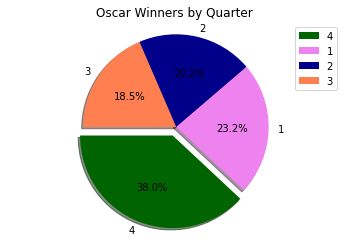

In [18]:
#create pie  for all other categories by Quarter

df1 = Oscar_OtherAwards_Release_Date_df["Quarter_Released"].value_counts().reset_index()
colors = ['darkgreen', 'violet', 'darkblue', 'coral']
index = ('Q1', 'Q2', 'Q3', 'Q4')
plt.pie(data=df1,x='Quarter_Released',labels='index', autopct='%.1f%%', explode=(0.1,0,0,0), shadow=True, startangle=180, colors = colors)
plt.axis('equal')
plt.title('Oscar Winners by Quarter')
plt.legend()
plt.savefig('AllWinnersByQuarters.png')
plt.show()

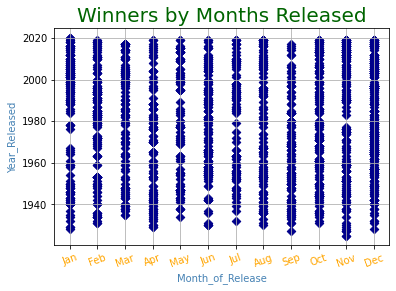

In [20]:
#create matplotlib scatter plot by month, adding name of month to xticks
plt.scatter(Oscar_OtherAwards_Release_Date_df["Month_of_Release"],Oscar_OtherAwards_Release_Date_df["Year_Released"], c = ("darkblue"), marker = "D")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], rotation=20, color='orange')
plt.title("Winners by Months Released",size=20, color="darkgreen")

plt.xlabel("Month_of_Release", color='steelblue')

plt.ylabel("Year_Released", color='steelblue')
plt.size = 100
plt.grid(True)
plt.savefig("AllWinnersByMonth.png")
plt.show()


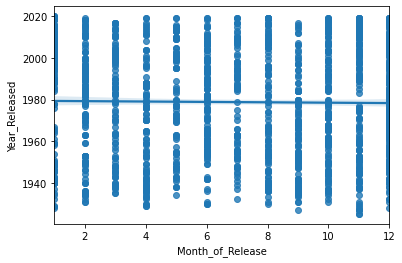

In [23]:
sns.regplot(x=Oscar_OtherAwards_Release_Date_df["Month_of_Release"], y=Oscar_OtherAwards_Release_Date_df["Year_Released"], data=year)
plt.savefig('AllWinnersByMonthRegression.png')